In [1]:
from main_extractor import *
from text_feature import *

In [2]:
words = {"любовь", "друг", "они", "я", "ты", "она", "что", "вы", "мы", "он"}

In [3]:
parts = {"PRON", "ADP", "ADV", "ADJ", "PROPN", "PART"}

In [4]:
rels = {"advmod", "conj", "amod", "nsubj", "obl", "nmod", "case", "obj"}

In [5]:
n_grams_letter = {"ной", "енн", "его", "ста", "ный", "что", "ень", "как", "люб"}

In [6]:
n_grams_all_symb = {"ой ", " не", "не ", " мо", " на", " по"}

In [7]:
fs = [
    TextFeature("len_words", "mean_key", args=(25,)), 
    TextFeature("homogeneity", "mean_key", args=(100,)), 
    TextFeature("rank", "mean_key"), 
    TextFeature("count_puncts_in_sentence", "mean_key", args=(25,)),
    TextFeature("count_words_in_sentence", "mean_key", args=(100,)),
    TextFeature("words", "select_keys_proportion", args=tuple(words)), 
    TextFeature("puncts", "select_keys_proportion", args=("!", "?")),
    TextFeature("parts", "select_keys_proportion", args=tuple(parts)), 
    TextFeature("rels", "select_keys_proportion", args=tuple(rels)),
    TextFeature("n_grams_letter", "select_keys_proportion", args=tuple(n_grams_letter)),
    TextFeature("n_grams_all_symb", "select_keys_proportion", args=tuple(n_grams_all_symb))]
    

In [8]:
print(count_features(fs))

46


In [63]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from random import random

In [101]:
path = r'C:\Users\gudko\Analysis-Pushkin-style\poems_corpus'
period = 1836 - 1813 + 1

X, target = [], []
for year in os.listdir(path):
    y = (int(year.split()[0]) - 1813) / period
    for t in os.listdir(os.path.join(path, year)):
        ft = text2features(os.path.join(year, t), fs)
        X.append(np.array(ft))
        target.append(random() / period + y)

In [102]:
names = get_names(fs)
df = pd.DataFrame(data=X, columns=names)
df = df.join(pd.DataFrame(data=target, columns=['target']))

In [103]:
df.describe()

,len_words,homogeneity,rank,count_puncts_in_sentence,count_words_in_sentence,words/он,words/они,words/вы,words/я,words/друг,...,n_grams_letter/ной,n_grams_letter/как,n_grams_letter/енн,n_grams_all_symb/ по,n_grams_all_symb/не,n_grams_all_symb/ мо,n_grams_all_symb/ не,n_grams_all_symb/ на,n_grams_all_symb/ой,target
count,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,...,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000
mean,0.196914,0.005045,0.098111,0.155213,0.150297,0.012049,0.003358,0.006563,0.027227,0.004115,...,0.002913,0.001630,0.002120,0.005710,0.004096,0.003373,0.005516,0.004959,0.005319,0.491553
std,0.017330,0.060261,0.048807,0.065299,0.064362,0.021096,0.008904,0.019693,0.031238,0.009213,...,0.003754,0.002802,0.003140,0.004909,0.004307,0.003597,0.004512,0.004064,0.004513,0.255574
min,0.130000,-0.400000,0.014584,0.040000,0.034000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008530
25%,0.186667,-0.010000,0.065608,0.118750,0.110000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.003040,0.000000,0.000000,0.002618,0.002406,0.002387,0.278952
50%,0.196364,0.000000,0.089258,0.140444,0.136414,0.000000,0.000000,0.000000,0.018519,0.000000,...,0.001923,0.000000,0.000990,0.005282,0.003413,0.002699,0.005015,0.004566,0.004736,0.494272
75%,0.207143,0.010000,0.120947,0.175000,0.172500,0.017189,0.002304,0.000000,0.045455,0.003831,...,0.004292,0.002336,0.003145,0.007299,0.005714,0.004926,0.007680,0.006667,0.007257,0.687726
max,0.260000,0.720000,0.333416,0.480000,0.570000,0.160000,0.080000,0.210526,0.214286,0.080000,...,0.025641,0.028169,0.025641,0.047619,0.035294,0.027027,0.029762,0.029126,0.031250,0.999909


array([[<Axes: title={'center': 'len_words'}>,
        <Axes: title={'center': 'homogeneity'}>,
        <Axes: title={'center': 'rank'}>,
        <Axes: title={'center': 'count_puncts_in_sentence'}>,
        <Axes: title={'center': 'count_words_in_sentence'}>,
        <Axes: title={'center': 'words/он'}>,
        <Axes: title={'center': 'words/они'}>],
       [<Axes: title={'center': 'words/вы'}>,
        <Axes: title={'center': 'words/я'}>,
        <Axes: title={'center': 'words/друг'}>,
        <Axes: title={'center': 'words/любовь'}>,
        <Axes: title={'center': 'words/она'}>,
        <Axes: title={'center': 'words/мы'}>,
        <Axes: title={'center': 'words/ты'}>],
       [<Axes: title={'center': 'words/что'}>,
        <Axes: title={'center': 'puncts/!'}>,
        <Axes: title={'center': 'puncts/?'}>,
        <Axes: title={'center': 'parts/ADJ'}>,
        <Axes: title={'center': 'parts/PART'}>,
        <Axes: title={'center': 'parts/ADV'}>,
        <Axes: title={'center': 'pa

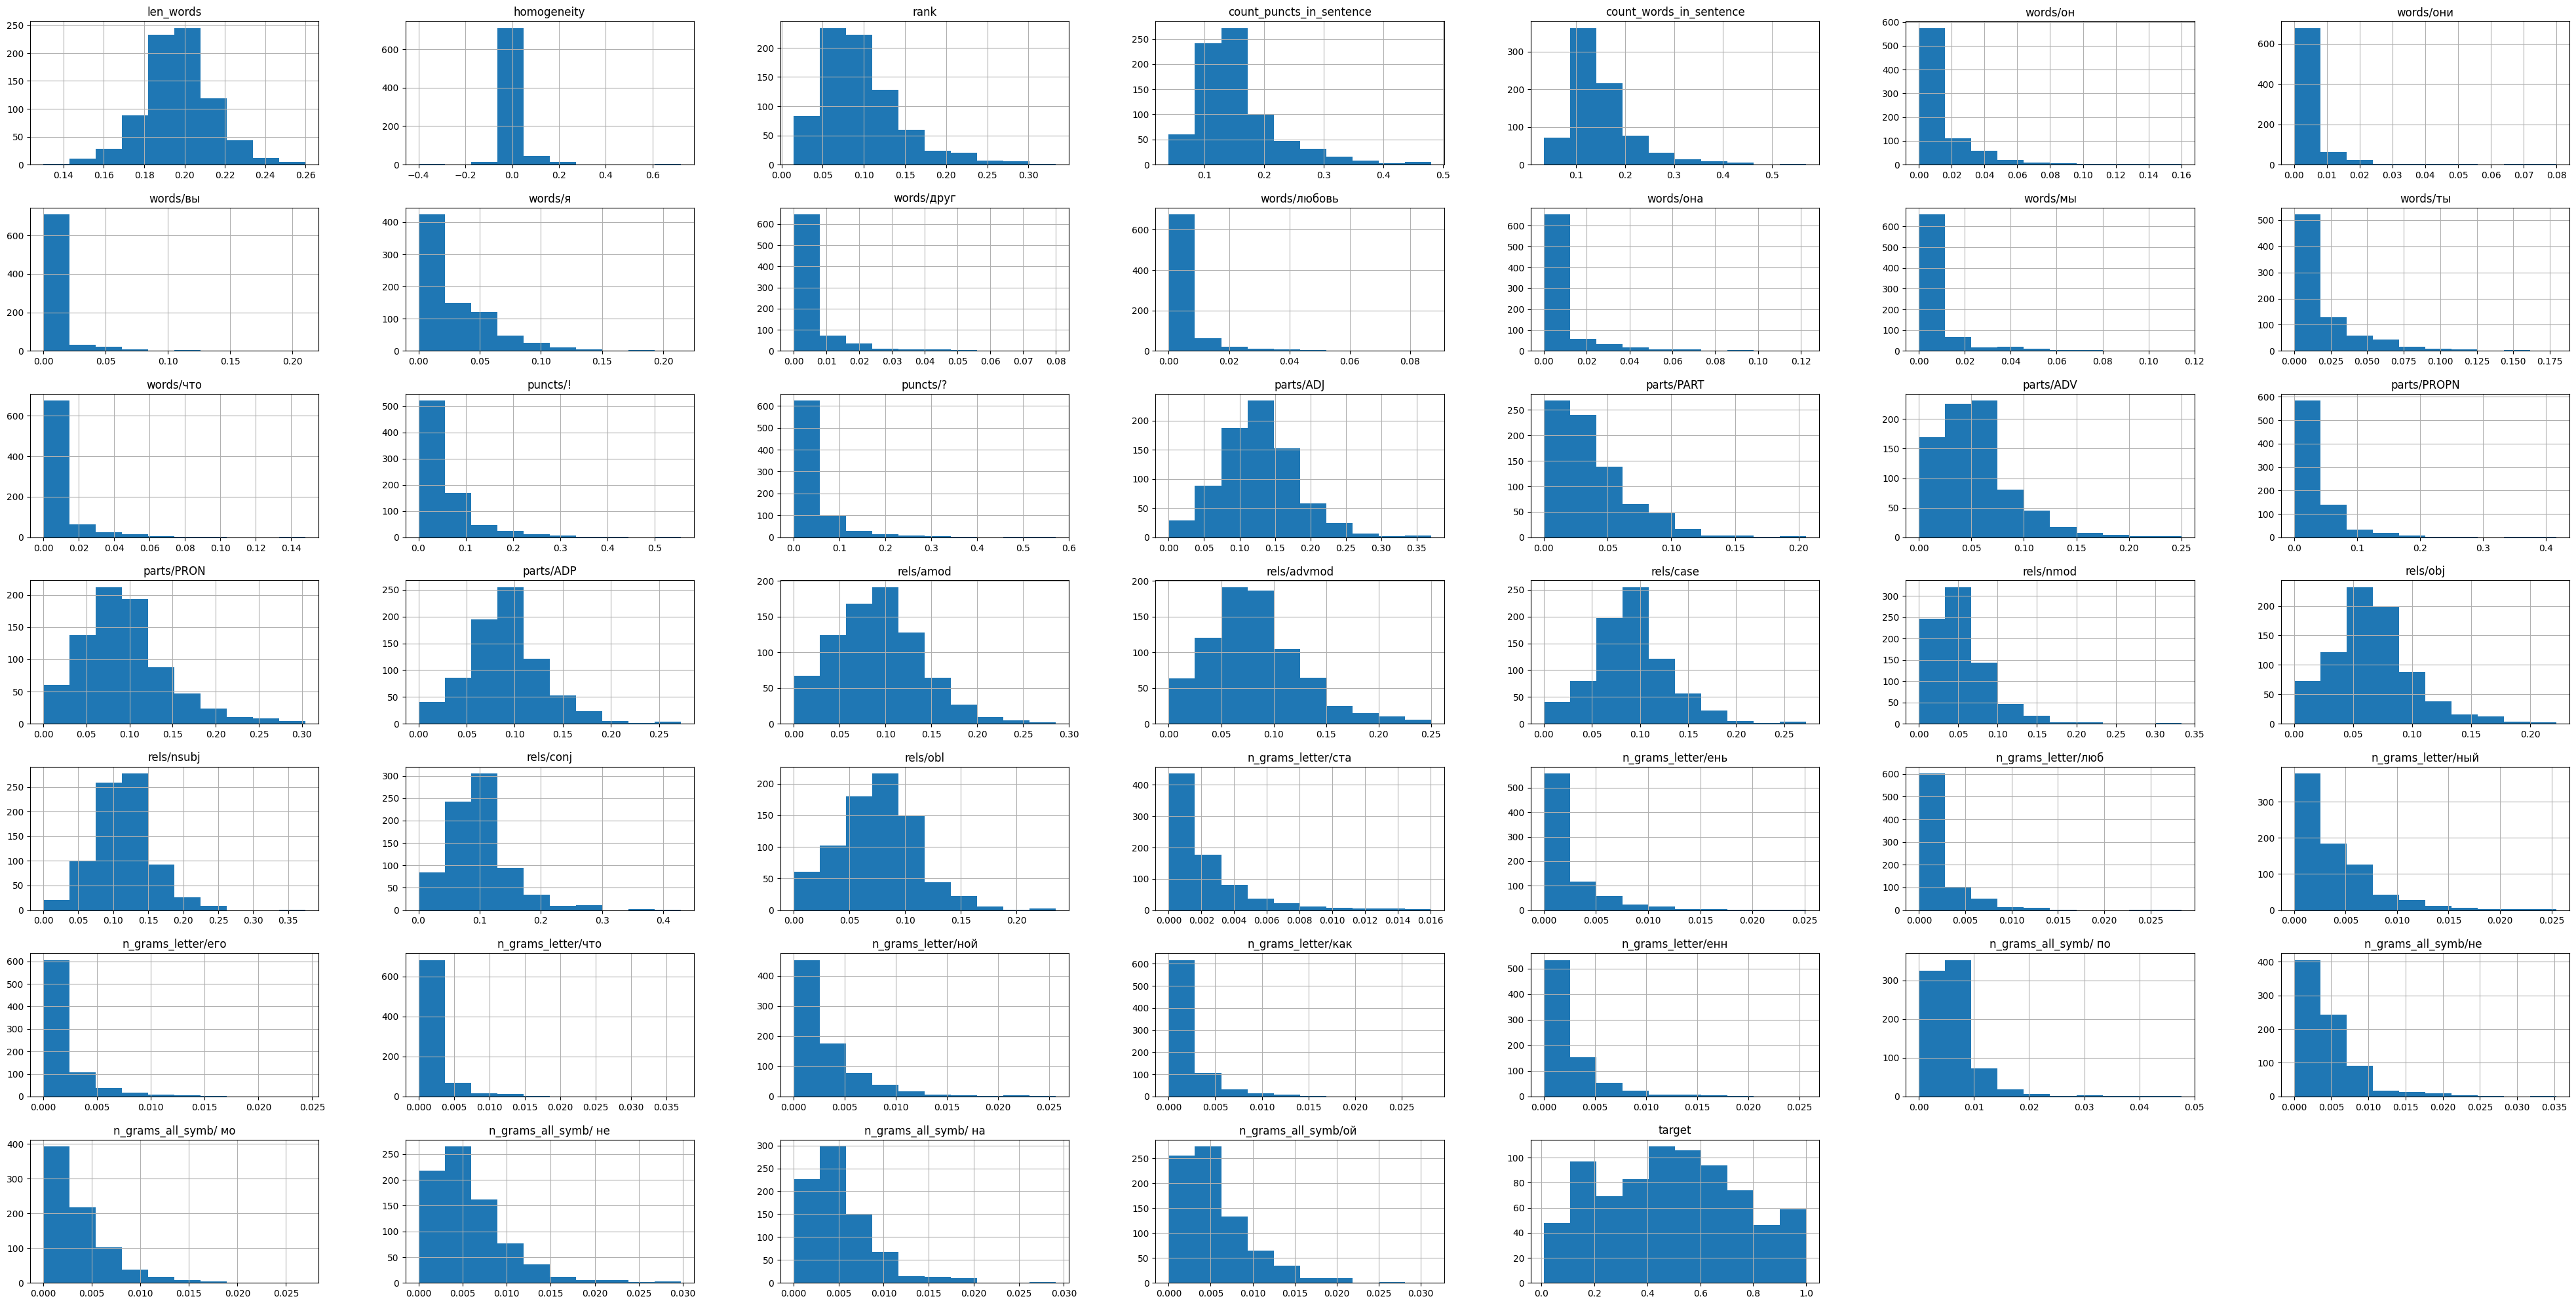

In [104]:
df.hist(figsize=(50, 25))

In [158]:
df.corr()['target']

len_words                  -0.096583
homogeneity                 0.023828
rank                        0.347139
count_puncts_in_sentence   -0.018936
count_words_in_sentence     0.007533
words/он                    0.029727
words/они                   0.107895
words/вы                    0.025050
words/я                     0.010161
words/друг                 -0.125393
words/любовь               -0.228726
words/она                   0.001091
words/мы                    0.070493
words/ты                   -0.012533
words/что                   0.021362
puncts/!                   -0.145565
puncts/?                   -0.034847
parts/ADJ                  -0.077224
parts/PART                  0.014181
parts/ADV                   0.099423
parts/PROPN                -0.036202
parts/PRON                  0.044884
parts/ADP                   0.040105
rels/amod                  -0.074524
rels/advmod                 0.073158
rels/case                   0.038850
rels/nmod                  -0.141574
r

In [67]:
from keras import models, layers
from sklearn.model_selection import train_test_split

In [106]:
x_train, x_test, y_train, y_test = train_test_split(X, target, random_state=313, test_size=0.2)

In [73]:
regr_model1 = models.Sequential()
regr_model1.add(layers.Input(shape=x_train.shape[1:]))
regr_model1.add(layers.Dense(32, activation='relu'))
regr_model1.add(layers.Dense(16, activation='relu'))
regr_model1.add(layers.Dense(1))

regr_model1.compile(optimizer='rmsprop', loss='mse', metrics=['mae', 'r2_score'])

In [115]:
h = regr_model1.fit(np.array(x_train), np.array(y_train), epochs=68, batch_size=32)

Epoch 1/68
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0372 - mae: 0.1546 - r2_score: 0.3843 
Epoch 2/68
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0382 - mae: 0.1591 - r2_score: 0.3797 
Epoch 3/68
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0411 - mae: 0.1629 - r2_score: 0.3451 
Epoch 4/68
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0383 - mae: 0.1564 - r2_score: 0.4022 
Epoch 5/68
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0379 - mae: 0.1566 - r2_score: 0.3997 
Epoch 6/68
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0370 - mae: 0.1526 - r2_score: 0.3913 
Epoch 7/68
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0412 - mae: 0.1651 - r2_score: 0.3949 
Epoch 8/68
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0340 - mae: 0.1487 - r2_score: 0.4221 
Epoch 9/68
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0361 - mae: 0.1512 - r2_score: 0.4313 
Epoch 10/68
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0363 - mae: 0.1548 - r2_score: 0.4212 
Epoch 11/

In [121]:
import matplotlib.pyplot as plt

def show_graph(t: str):
    data = h.history[t]
    epochs = range(1, len(data) + 1)
    plt.plot(epochs, data, 'b')
    plt.title('Training ' + t)
    plt.show()

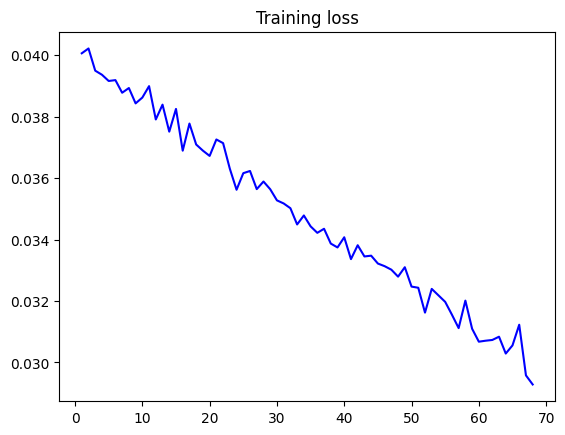

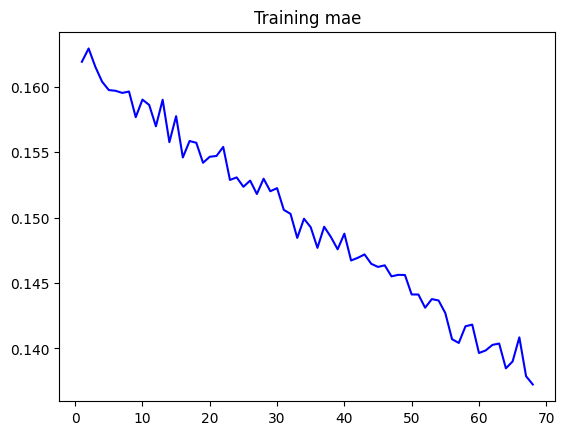

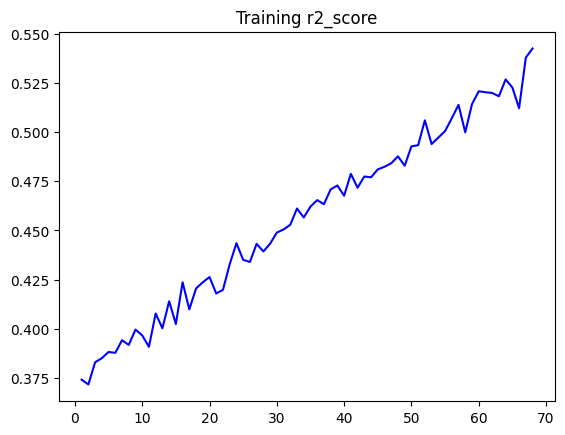

In [122]:
show_graph('loss')
show_graph('mae')
show_graph('r2_score')

In [116]:
res = regr_model1.evaluate(np.array(x_test), np.array(y_test), return_dict=True)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0477 - mae: 0.1734 - r2_score: 0.3202


In [157]:
0.1734 * 24

4.1616

In [123]:
from sklearn.decomposition import PCA

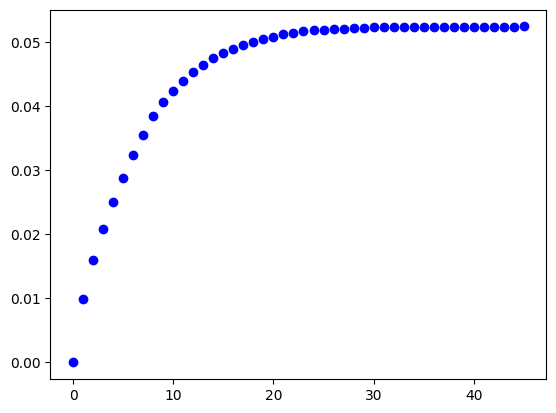

In [126]:
pca = PCA(n_components=count_features(fs), random_state=313)
pca.fit(X)
com_ev = [sum(pca.explained_variance_[:i]) for i in range(len(pca.explained_variance_))]
plt.plot(range(count_features(fs)), com_ev, 'bo')

In [132]:
print('component0 ~')
for i, c in enumerate(sorted(pca.components_[0], reverse=True)):
    if c > 0.001:
        print(' + ', c, ' * ', get_names(fs)[i])
    else:
        break

component0 ~
 +  0.5616333706949309  *  len_words
 +  0.5296476870101198  *  homogeneity
 +  0.2427498300534569  *  rank
 +  0.17099426034583554  *  count_puncts_in_sentence
 +  0.1674885243864341  *  count_words_in_sentence
 +  0.08351023325827682  *  words/он
 +  0.0794748505660353  *  words/они
 +  0.07128615010849464  *  words/вы
 +  0.055991167702654866  *  words/я
 +  0.045345099477343574  *  words/друг
 +  0.026616918808911115  *  words/любовь
 +  0.0068026608979045175  *  words/она
 +  0.003919570763411264  *  words/мы
 +  0.0038803475897696707  *  words/ты
 +  0.003688164431296845  *  words/что
 +  0.003493693284384957  *  puncts/!
 +  0.003183773415395333  *  puncts/?
 +  0.0025858514626461927  *  parts/ADJ
 +  0.0023880975660778964  *  parts/PART


In [133]:
pca_nn = PCA(n_components=24, random_state=313)
X_pca = pca_nn.fit_transform(X)
x_pca_train, x_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, target, random_state=313, test_size=0.2)

In [152]:
regr_model2 = models.Sequential()
regr_model2.add(layers.Input(shape=x_pca_train.shape[1:]))
regr_model2.add(layers.Dense(32, activation='relu'))
regr_model2.add(layers.Dense(16, activation='relu'))
regr_model2.add(layers.Dense(1))

regr_model2.compile(optimizer='rmsprop', loss='mse', metrics=['mae', 'r2_score'])

In [153]:
h = regr_model2.fit(np.array(x_pca_train), np.array(y_pca_train), epochs=100, batch_size=32)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2591 - mae: 0.4445 - r2_score: -3.2527   
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1441 - mae: 0.3127 - r2_score: -1.2088 
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0736 - mae: 0.2240 - r2_score: -0.1784 
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0611 - mae: 0.2019 - r2_score: 0.0475 
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0606 - mae: 0.2034 - r2_score: 0.0790 
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0599 - mae: 0.2003 - r2_score: 0.0609  
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0561 - mae: 0.1942 - r2_score: 0.1446 
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0494 - mae: 0.1816 - r2_score: 0.1363 
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0545 - mae: 0.1920 - r2_score: 0.1615 
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0533 - mae: 0.1893 - r2_score: 0

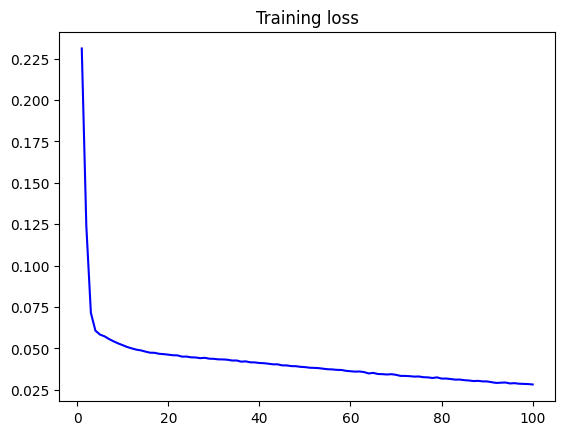

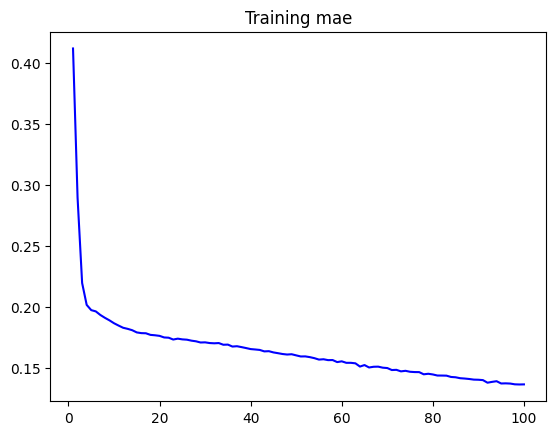

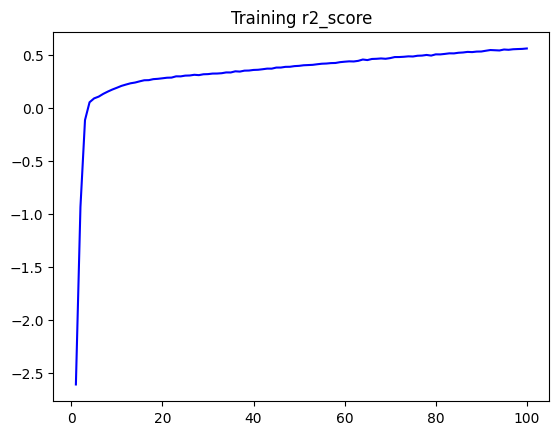

In [154]:
show_graph('loss')
show_graph('mae')
show_graph('r2_score')

In [155]:
res2 = regr_model2.evaluate(np.array(x_pca_test), np.array(y_pca_test), return_dict=True)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0442 - mae: 0.1640 - r2_score: 0.3718 


In [156]:
0.164 * 24

3.936